In [1]:
using Plots, Interact, ForwardDiff, LinearOperators

# Algoritmo de busca linear geral

- Dado $x_0 \in \mathbb{R}^n$, $k = 0$
- Enquanto $\nabla f(x_k) \neq 0$
  - Escolha $d_k$ **direção de descida**;
  - Escolha $t_k$, um tamanho de passo;
  - Faça $x_{k+1} = x_k + t_k d_k$;
  - Incremente $k$

## Direções tradicionais

- Gradiente $d_k = -\nabla f(x_k)$
- Newton: $d_k = -[\nabla^2 f(x_k)]^{-1} \nabla f(x_k)$
- BFGS: $d_k = -H_k \nabla f(x_k)$

Interact.Options{:SelectionSlider,Float64}(1: "input" = -0.020202020202020204 Float64 , "ax", -0.020202020202020204, "-0.020202020202020204", 50, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.9595959595959596"=>-1.9596,"-1.9191919191919191"=>-1.91919,"-1.878787878787879"=>-1.87879,"-1.8383838383838385"=>-1.83838,"-1.797979797979798"=>-1.79798,"-1.7575757575757576"=>-1.75758,"-1.7171717171717171"=>-1.71717,"-1.6767676767676767"=>-1.67677,"-1.6363636363636365"=>-1.63636…), Dict(1.35354=>"1.3535353535353536",2.0=>"2.0",-0.787879=>"-0.7878787878787878",-0.10101=>"-0.10101010101010101",-1.47475=>"-1.4747474747474747",-1.55556=>"-1.5555555555555556",1.87879=>"1.878787878787879",1.15152=>"1.1515151515151516",0.989899=>"0.98989898989899",0.10101=>"0.10101010101010101"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = -0.020202020202020204 Float64 , "ay", -0.020202020202020204, "-0.020202020202020204", 50, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.9595959595959596"=>-1.9596,"-1.9191919191919191"=>-1.91919,"-1.878787878787879"=>-1.87879,"-1.8383838383838385"=>-1.83838,"-1.797979797979798"=>-1.79798,"-1.7575757575757576"=>-1.75758,"-1.7171717171717171"=>-1.71717,"-1.6767676767676767"=>-1.67677,"-1.6363636363636365"=>-1.63636…), Dict(1.35354=>"1.3535353535353536",2.0=>"2.0",-0.787879=>"-0.7878787878787878",-0.10101=>"-0.10101010101010101",-1.47475=>"-1.4747474747474747",-1.55556=>"-1.5555555555555556",1.87879=>"1.878787878787879",1.15152=>"1.1515151515151516",0.989899=>"0.98989898989899",0.10101=>"0.10101010101010101"…)), Any[], Any[], true, "horizontal", true)

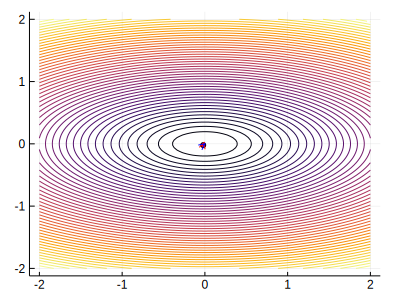

In [2]:
gr(size=(400,300))

f(x) = sqrt(1 + x[1]^2 + 4 * x[2]^2)
g(x) = ForwardDiff.gradient(f, x)
H(x) = ForwardDiff.hessian(f, x)
X = linspace(-2, 2, 100)
Y = linspace(-2, 2, 100)

@manipulate for ax = X, ay = Y
    contour(X, Y, (x,y) -> f([x,y]), leg=false, levels=50)
    a = [ax; ay]
    scatter!([ax], [ay], c=:red, ms=3)
    
    dC = -g(a)
    αC = 1.0
    while f(a + αC * dC) > f(a) + 1e-2 * dot(dC, g(a))
        αC *= 0.5
    end
    dC *= αC
    plot!(ax + [0; dC[1]], ay + [0; dC[2]], c=:red, l=:arrow)
        
    dN = -H(a) \ g(a)
    if dot(dN, g(a)) < -1e-5
        αN = 1.0
        while f(a + αN * dN) > f(a) + 1e-2 * dot(dN, g(a))
            αN *= 0.5
        end
        dN *= αN
        plot!(ax + [0; dN[1]], ay + [0; dN[2]], c=:blue, l=:arrow)
    end
end

# O método do Gradiente

A ideia do método do Gradiente é usar a direção de maior decrescimento: $-\nabla f(x)$. O problema é saber quanto.

\begin{align*}
  d_k & = -\nabla f(x_k) \\
  & \text{ache } \alpha_k \\
  x_{k+1} & = x_k + \alpha_k d_k
\end{align*}

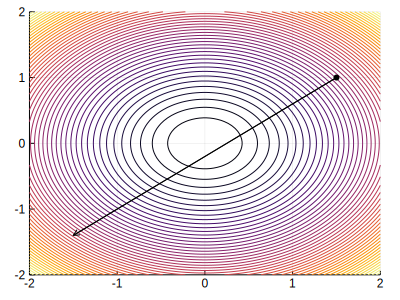

In [3]:
f(x, y) = x^2 + 1.2 * y^2
#f(x, y) = 0.1 * (x^2 + 1.2 * y^2)
#f(x, y) = 0.01 * (x^2 + 1.2 * y^2)
X, Y = linspace(-2, 2, 100), linspace(-2, 2, 100)

contour(X, Y, f, leg=false, levels=50)
a = [1.5; 1.0]
d = -ForwardDiff.gradient(x -> f(x[1],x[2]), a)
scatter!([a[1]], [a[2]], c=:black, ms=3)
plot!(a[1] + [0, d[1]], a[2] + [0, d[2]], c=:black, l=:arrow)
xlims!(X[1], X[end])
ylims!(Y[1], Y[end])

- Busca exata: $\alpha_k = \arg\min f(x_k + \alpha d_k)$
- Busca inexata: (Condição de Armijo) $f(x_k + \alpha_k d_k) < f(x_k) + \alpha_k \eta \nabla f(x_k)^T d_k$
- Sem busca: $\alpha_k$ constante, ou com regras que não avaliam $f$

## Busca inexata

- Tente $\alpha_k$ = 1
- Se não funcionar, faça $\alpha_k = \sigma \alpha_k$, $\sigma \in (0,1)$, e tente de novo

Interact.Slider{Int64}(7: "input-3" = -1 Int64 , "", -1, -1:10, "horizontal", true, "d", true)

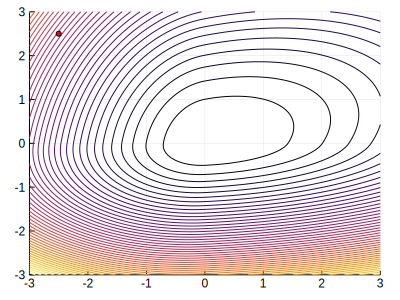

In [4]:
f(x) = x[1]^2 + 4 * x[2]^2 - 2 * x[1] * x[2]; x0 = [-2.5; 2.5]
f(x) = sqrt(1 + x[1]^4 + 4 * x[2]^4); x0 = [-2.5; 2.5]
f(x) = max(x[1], -2*x[1])^2 + 2 * max(x[2], -2*x[2])^2 - x[1] * x[2]; x0 = [-2.5; 2.5]
grad(x) = ForwardDiff.gradient(f, x)

X = linspace(-3, 3, 100)
Y = linspace(-3, 3, 100)
@manipulate for n = slider(-1:10, value=-1)
    contour(X, Y, (x,y) -> f([x;y]), leg=false, levels=50)
    a = x0
    scatter!([a[1]], [a[2]], ms=3, c=:red)
    for k = 0:n
        d = -grad(a)
        α = 1.0
        while f(a + α * d) > f(a) - 1e-2 * α * dot(d, d)
            α *= 0.5
        end
        plot!(a[1] + [0, α * d[1]], a[2] + [0, α * d[2]], c=:red, l=:arrow)
        a += α * d
        scatter!([a[1]], [a[2]], ms=3, c=:red)
    end
    xlims!(extrema(X)...)
    ylims!(extrema(Y)...)
end

Interact.Options{:ToggleButtons,Float64}(11: "input-4" = 0.01 Float64 , "η", 0.01, "0.01", 1, Interact.OptionDict(DataStructures.OrderedDict("0.01"=>0.01,"0.1"=>0.1,"0.5"=>0.5), Dict(0.01=>"0.01",0.5=>"0.5",0.1=>"0.1")), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Float64}(13: "input-5" = 0.9 Float64 , "σ", 0.9, "0.9", 1, Interact.OptionDict(DataStructures.OrderedDict("0.9"=>0.9,"0.5"=>0.5,"0.2"=>0.2), Dict(0.5=>"0.5",0.2=>"0.2",0.9=>"0.9")), Any[], Any[], true, "horizontal", true)

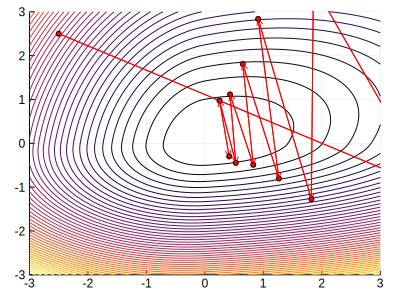

In [5]:
f(x) = x[1]^2 + 4 * x[2]^2; x0 = [-2.5; 2.5]
f(x) = sqrt(1 + x[1]^4 + 4 * x[2]^4); x0 = [-2.5; 2.5]
f(x) = max(x[1], -2*x[1])^2 + 2 * max(x[2], -2*x[2])^2 - x[1] * x[2]; x0 = [-2.5; 2.5]
grad(x) = ForwardDiff.gradient(f, x)

X = linspace(-3, 3, 100)
Y = linspace(-3, 3, 100)
@manipulate for η = [1e-2; 1e-1; 0.5],
                σ = [0.9; 0.5; 0.2]
    contour(X, Y, (x,y) -> f([x;y]), leg=false, levels=50)
    a = x0
    scatter!([a[1]], [a[2]], ms=3, c=:red)
    solved = tired = false
    k = 0
    while !(solved || tired)
        d = -grad(a)
        α = 1.0
        while f(a + α * d) > f(a) - η * α * dot(d, d)
            α *= σ
        end
        plot!(a[1] + [0, α * d[1]], a[2] + [0, α * d[2]], c=:red, l=:arrow)
        a += α * d
        scatter!([a[1]], [a[2]], ms=3, c=:red)
        solved = norm(d) < 1e-3
        k += 1
        tired = k > 10
    end
    xlims!(extrema(X)...)
    ylims!(extrema(Y)...)
end

In [6]:
## Gradiente com passo constante

Se $f$ é convexa, $\alpha$ pode ser escolhido pequeno o suficiente de modo que o método converge.

f(x) = x[1]^2 + 4 * x[2]^2 - 2 * x[1] * x[2]; x0 = [-2.5; 2.5]
#f(x) = sqrt(1 + x[1]^4 + 4 * x[2]^4); x0 = [-2.5; 2.5]
f(x) = max(x[1], -2*x[1])^2 + 2 * max(x[2], -2*x[2])^2 - x[1] * x[2]; x0 = [-2.5; 2.5]
grad(x) = ForwardDiff.gradient(f, x)

X = linspace(-3, 3, 100)
Y = linspace(-3, 3, 100)
@manipulate for α = slider(linspace(0.1, 0.7, 100), value=0.1)
    contour(X, Y, (x,y) -> f([x;y]), leg=false, levels=50)
    a = x0
    scatter!([a[1]], [a[2]], ms=3, c=:red)
    solved = tired = false
    k = 0
    while !(solved || tired)
        d = -grad(a)
        plot!(a[1] + [0, α * d[1]], a[2] + [0, α * d[2]], c=:red, l=:arrow)
        a += α * d
        scatter!([a[1]], [a[2]], ms=3, c=:red)
        solved = norm(d) < 1e-3
        k += 1
        tired = k > 10
    end
    xlims!(extrema(X)...)
    ylims!(extrema(Y)...)
end

LoadError: [91msyntax: extra token "convexa" after end of expression[39m

## Cauchy para quadráticas

$$ f(x) = \frac{1}{2} x^T A x - x^T b, $$
equivalente à
$$ Ax = b, $$
para $A$ quadrática.

Em particular, para $f(x) = \frac{1}{2}\Vert Ax - b\Vert^2 = \frac{1}{2}x^T A^T A x - x^T (A^Tb) + \frac{1}{2} b^T b$.

Dado $d = -\nabla f(x) = b - Ax$, podemos encontrar o mínimo nessa direção, obtendo o método de Cauchy (Método do Gradiente com Busca Exata)

- Dado $x_0$, $k = 0$
- Enquanto $Ax_k \neq b$
  - Defina $d_k = b - Ax_k$
  - Calcule $\alpha_k = \arg\min f(x_k + \alpha d_k) = \dfrac{d_k^Td_k}{d_k A d_k}$
  - Atualize $x_{k+1} = x_k + \alpha_k d_k$

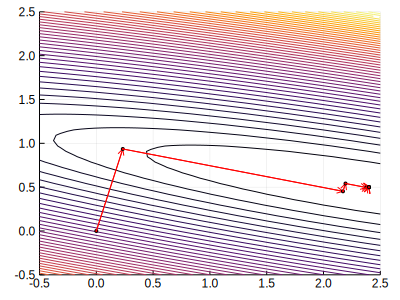

In [7]:
Q = [1 5; 5 -1]
A = Q * diagm([50; 1]) * Q'
b = A * [2.4; 0.5]

X = linspace(-0.5, 2.5)
Y = linspace(-0.5, 2.5)
q(x,y) = 0.5 * dot([x; y], A * [x; y]) - dot([x; y], b)
contour(X, Y, q, leg=false, levels=50)
x = zeros(2)
scatter!([x[1]], [x[2]], ms=2, c=:red)
while norm(A * x - b) > 1e-3
    d = b - A * x
    α = dot(d, d) / dot(d, A * d)
    plot!(x[1] + [0; α * d[1]], x[2] + [0; α * d[2]], l=:arrow, c=:red)
    x += α * d
    scatter!([x[1]], [x[2]], ms=2, c=:red)
end
xlims!(extrema(X)...)
ylims!(extrema(Y)...)

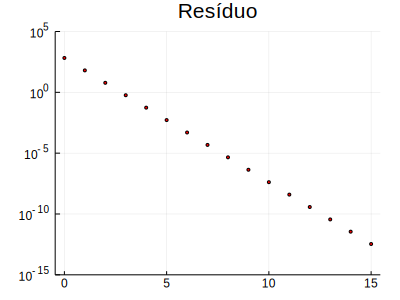

In [8]:
Q = [1 5; 5 -1]
A = Q * diagm([50; 1]) * Q'
b = A * [2.4; 0.5]

q(x) = 0.5 * dot(x, A * x) - dot(b, x)
qmin = q([2.4; 0.5])
x = zeros(2)
scatter([0], [q(x) - qmin], ms=2, c=:red, leg=false, yaxis=:log)
k = 0
while norm(A * x - b) > 1e-5
    k += 1
    d = b - A * x
    α = dot(d, d) / dot(d, A * d)
    x += α * d
    scatter!([k], [q(x) - qmin], ms=2, c=:red)
end
title!("Resíduo")
ylims!(1e-15, 1e5)

# Newton

Interact.Options{:ToggleButtons,Symbol}(17: "input-6" = puro Symbol , "strategy", :puro, "puro", 1, Interact.OptionDict(DataStructures.OrderedDict("puro"=>:puro,"busca"=>:busca), Dict(:puro=>"puro",:busca=>"busca")), Any[], Any[], true, "horizontal", true)

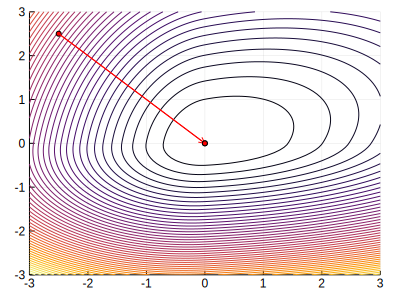

In [9]:
f(x) = x[1]^2 + 4 * x[2]^2 - 2 * x[1] * x[2]; x0 = [-2.5; 2.5]
f(x) = sqrt(1 + x[1]^4 + 4 * x[2]^4); x0 = [-2.5; 2.2]
f(x) = max(x[1], -2*x[1])^2 + 2 * max(x[2], -2*x[2])^2 - x[1] * x[2]; x0 = [-2.5; 2.5]
grad(x) = ForwardDiff.gradient(f, x)
hess(x) = ForwardDiff.hessian(f, x)

X = linspace(-3, 3, 100)
Y = linspace(-3, 3, 100)
@manipulate for strategy in [:puro, :busca]
    contour(X, Y, (x,y) -> f([x;y]), leg=false, levels=50)
    a = x0
    scatter!([a[1]], [a[2]], ms=3, c=:red)
    solved = tired = false
    k = 0
    while !(solved || tired)
        d = -hess(a) \ grad(a)
        α = 1.0
        if strategy == :busca
            while f(a + α * d) > f(a) + 1e-2 * α * dot(d, grad(a))
                α *= 0.5
            end
        end
        plot!(a[1] + [0, α * d[1]], a[2] + [0, α * d[2]], c=:red, l=:arrow)
        a += α * d
        scatter!([a[1]], [a[2]], ms=3, c=:red)
        solved = norm(d) < 1e-3
        k += 1
        tired = k > 10
    end
    xlims!(extrema(X)...)
    ylims!(extrema(Y)...)
end

- **Para funções convexas, Newton é quase sempre melhor**;
- Mas envolve mais cálculos de função;
- e a resolução de um sistema linear por iteração.
- e comparando ao **gradiente estocástico**, é ainda mais caro.

## BFGS

- A Hessiana é aproximada e atualizada cada iteração;
- Bem implementado é mais barato que Newton;
- Muito mais eficiente que o método do gradiente.

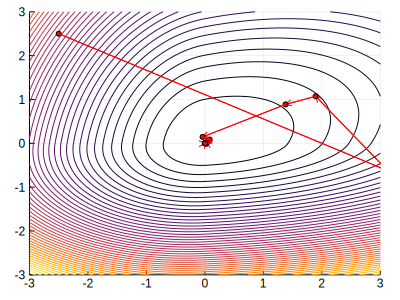

In [10]:
f(x) = x[1]^2 + 4 * x[2]^2 - 2 * x[1] * x[2]; x0 = [-2.5; 2.5]
f(x) = sqrt(1 + x[1]^4 + 4 * x[2]^4); x0 = [-2.5; 2.2]
f(x) = max(x[1], -2*x[1])^2 + 2 * max(x[2], -2*x[2])^2 - x[1] * x[2]; x0 = [-2.5; 2.5]
grad(x) = ForwardDiff.gradient(f, x)

X = linspace(-3, 3, 100)
Y = linspace(-3, 3, 100)

    contour(X, Y, (x,y) -> f([x;y]), leg=false, levels=50)
    a = x0
    Hx = InverseLBFGSOperator(2)
    scatter!([a[1]], [a[2]], ms=3, c=:red)
    solved = tired = false
    k = 0
    while !(solved || tired)
        d = -Hx * grad(a)
        α = 1.0
        while f(a + α * d) > f(a) + 1e-2 * α * dot(d, grad(a))
            α *= 0.5
        end
        plot!(a[1] + [0, α * d[1]], a[2] + [0, α * d[2]], c=:red, l=:arrow)
        push!(Hx, α * d, g(a + α * d) - g(a))
        a += α * d
        scatter!([a[1]], [a[2]], ms=3, c=:red)
        solved = norm(d) < 1e-3
        k += 1
        tired = k > 10
    end
    xlims!(extrema(X)...)
    ylims!(extrema(Y)...)

# Técnicas para restrições

## Projeções

- Se o conjunto $\Omega$ for fácil, podemos projetar no conjunto durante os passos;
- O caso mais comum é o gradiente projetado para caixas;
- Aparece como subproblema de problemas maiores como minimização de **quadráticas em caixas**.

## Restaurações / Passos normal e tangente

- Separa-se a busca por um ponto mais factível de um ponto mais ótimo;
- Um passo melhora a função objetivo, sem ir muito longe do conjunto ótimo;
- Um passo se aproxima do conjunto ótimo, sem piorar muito a função.

## Penalização

- As restrições são embutidas na função objetivo como uma penalização;
- $\min\ f(x)$ sujeito à $c(x) = 0$ vira $\min\ f(x) + \rho \Vert c(x)\Vert^2$;
- $\rho \to \infty$ leva à viabilidade.

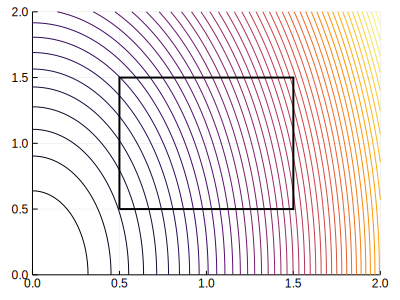

In [28]:
f(x,y) = x^2 + y^2 / 4
ℓ = 0.5 * ones(2)
u = 1.5 * ones(2)
X = linspace(0, 2, 100)
Y = copy(X)
contour(X, Y, f, levels=50, leg=false)
plot!([ℓ[1], u[1], u[1], ℓ[1], ℓ[1]], [ℓ[2], ℓ[2], u[2], u[2], ℓ[2]], lw=2, c=:black)
xlims!(extrema(X)...)
ylims!(extrema(Y)...)

Interact.Options{:ToggleButtons,Float64}(65: "input-18" = 0.0 Float64 , "ρ", 0.0, "0.0", 1, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"1.0"=>1.0,"3.0"=>3.0,"10.0"=>10.0), Dict(0.0=>"0.0",10.0=>"10.0",3.0=>"3.0",1.0=>"1.0")), Any[], Any[], true, "horizontal", true)

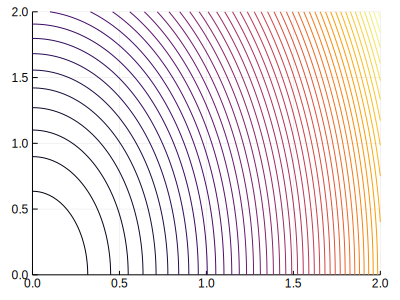

In [29]:
f(x,y) = x^2 + y^2 / 4
ℓ = 0.5 * ones(2)
u = 1.5 * ones(2)
X = linspace(0, 2, 100)
Y = copy(X)
@manipulate for ρ = [0.0, 1.0, 3.0, 10.0]
    q(x,y) = f(x,y) + ρ * (sum(max.(0, [x; y] - u).^2) + sum(min.(0, [x; y] - ℓ).^2))
    contour(X, Y, q, levels=linspace(0, 10, 100), leg=false)
    #plot!([ℓ[1], u[1], u[1], ℓ[1], ℓ[1]], [ℓ[2], ℓ[2], u[2], u[2], ℓ[2]], lw=2, c=:black)
    xlims!(extrema(X)...)
    ylims!(extrema(Y)...)
end

## Pontos interiores (barreira)

- As restrições são embutidas na função objetivo como uma penalização;
- $\min\ f(x)$ sujeito à $x \geq 0$ vira $\min\ f(x) - \mu \sum_i \ln x_i$;
- A viabilidade é sempre atingida, $\mu \to 0$ leva à borda.

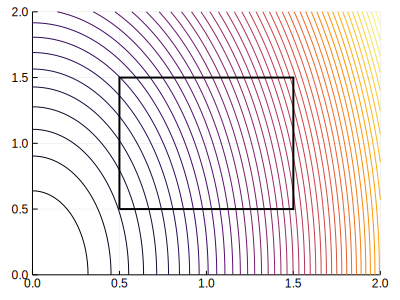

In [30]:
f(x,y) = x^2 + y^2 / 4
ℓ = 0.5 * ones(2)
u = 1.5 * ones(2)
X = linspace(0, 2, 100)
Y = copy(X)
contour(X, Y, f, levels=50, leg=false)
plot!([ℓ[1], u[1], u[1], ℓ[1], ℓ[1]], [ℓ[2], ℓ[2], u[2], u[2], ℓ[2]], lw=2, c=:black)
xlims!(extrema(X)...)
ylims!(extrema(Y)...)

Interact.Options{:ToggleButtons,Float64}(87: "input-24" = 100.0 Float64 , "μ", 100.0, "100.0", 1, Interact.OptionDict(DataStructures.OrderedDict("100.0"=>100.0,"10.0"=>10.0,"1.0"=>1.0,"0.1"=>0.1,"0.01"=>0.01), Dict(100.0=>"100.0",10.0=>"10.0",0.01=>"0.01",0.1=>"0.1",1.0=>"1.0")), Any[], Any[], true, "horizontal", true)

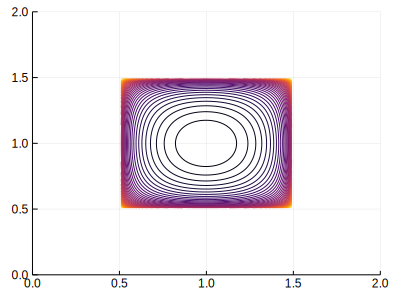

In [36]:
f(x,y) = x^2 + y^2 / 4
ℓ = 0.5 * ones(2)
u = 1.5 * ones(2)
X = linspace(ℓ[1] + 1e-2, u[1] - 1e-2, 100)
Y = linspace(ℓ[2] + 1e-2, u[2] - 1e-2, 100)
@manipulate for μ = [100; 10; 1; 0.1; 0.01]
    q(x,y) = f(x,y) - μ * (log(x - ℓ[1]) + log(y - ℓ[2]) + log(u[1] - x) + log(u[2] - y))
    contour(X, Y, q, levels=50, leg=false)
    #plot!([ℓ[1], u[1], u[1], ℓ[1], ℓ[1]], [ℓ[2], ℓ[2], u[2], u[2], ℓ[2]], lw=2, c=:black)
    xlims!(0, 2)
    ylims!(0, 2)
end